<a href="https://colab.research.google.com/github/ch00226855/CMP414765Spring2022/blob/main/Week03_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3 Classification

**Reference: Chapter 3**

Last week we explored a regression task using primarily our own observation of the data. This week let's look at a classification task, and see how existing machine learning techniques can be applied to solve it.

## Classifying Points on the Plane

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Load the data set

In [ ]:
url = "https://raw.githubusercontent.com/empathy87/The-Elements-of-Statistical-Learning-Python-Notebooks/master/data/mixture.txt"
# Open the url in web brower and learn its raw format

# Load to Python as a data frame
raw_data = pd.read_csv(url)

# Display first 5 rows
raw_data.head()

### 2. Data Exploration

In [ ]:
# Show the size of the data set
raw_data.shape

In [ ]:
# Show the data type of each column
raw_data.dtypes

In [ ]:
# Is there any missing values?
raw_data.isnull().sum()

In [ ]:
# Example: A data frame with missing values
temp = pd.DataFrame({
    "Midterm": [100, 90, 80],
    "Final": [80, 90, 100],
    "Grade": ['A', np.nan, 'A']
})
temp

In [ ]:
temp.isnull().sum()

In [ ]:
# plot the distribution as histograms
numeric_cols = ['x1', 'x2']
raw_data[numeric_cols].hist()

In [ ]:
# x1, x2 are numeric values. What is the distribution of values?

raw_data[numeric_cols].describe()

In [ ]:
# Plot data as points on a 2D plane
blue_pts = raw_data[raw_data['y'] == 0]
red_pts = raw_data[raw_data['y'] == 1]
plt.plot(blue_pts['x1'], blue_pts['x2'], 'b.', label='y = 0')
plt.plot(red_pts['x1'], red_pts['x2'], 'r.', label='y = 1')
plt.title('Visualization of Data Set')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='lower left')
plt.savefig('Week3Fig.png')

### 3. Build a Classification Model
The `sklearn` package provides implementations of many existing machine elarning techniques. Today we are going to apply **support vector machine (SVM)** and **k-nearest-neighbors** method to build two different classification models.

### Attempt 1: Linear SVM

![Illustration of SVM](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/300px-SVM_margin.png)

In [ ]:
# SVM model
from sklearn.svm import LinearSVC
model_svm = LinearSVC()
input_cols = ['x1', 'x2']
model_svm.fit(raw_data[input_cols], raw_data['y'])

In [ ]:
# Predict the class of point(-2, 2) and (3, -1)
test_data = pd.DataFrame({
    'x1': [-2, 3, 0],
    'x2': [2, -1, -2]
})
test_data

In [ ]:
predictions = model_svm.predict(test_data[['x1', 'x2']])
print(predictions)

In [ ]:
# Visualize the decision region
plot_data = pd.DataFrame(columns=['x1', 'x2'])
x1_coordinates = np.linspace(-3, 4, 100) # sample 100 points per row
x2_coordinates = np.linspace(-2, 3, 100) # sample 100 rows (total: 100 * 100 = 10,000 points)

row_index = 0
for x1 in x1_coordinates:
    for x2 in x2_coordinates:
        plot_data.loc[row_index, :] = [x1, x2]
        row_index += 1
plot_data.head()

In [ ]:
# It is faster to create plot_data using functions from numpy
x1_data, x2_data = np.meshgrid(x1_coordinates, x2_coordinates)
print(x1_data[:5, :5])
print(x2_data[:5, :5])

x1_data = np.array(x1_data).reshape([10000])
print(x1_data[:5])

x2_data = np.array(x2_data).reshape([10000])

plot_data = pd.DataFrame()
plot_data['x1'] = x1_data
plot_data['x2'] = x2_data
plot_data

In [ ]:
plot_data['prediction'] = model_svm.predict(plot_data[['x1', 'x2']])
plot_data.head()

In [ ]:
test_data_blue = plot_data[plot_data['prediction'] == 0]
test_data_red = plot_data[plot_data['prediction'] == 1]
plt.plot(test_data_blue['x1'], test_data_blue['x2'], 'b.', alpha=0.1)
plt.plot(test_data_red['x1'], test_data_red['x2'], 'r.', alpha=0.1)
plt.plot(blue_pts['x1'], blue_pts['x2'], 'b^', label='y = 0')
plt.plot(red_pts['x1'], red_pts['x2'], 'r^', label='y = 1')

**Discussion:** How to evaluate this model?

In [ ]:
# Split the data set into training set (80%) and test set (20%), 
# and build a SVM model on the new training set
from sklearn.model_selection import train_test_split
training_data, test_data = train_test_split(raw_data, test_size=0.2)

In [ ]:
# Display the shape of training set

training_data.shape

In [ ]:
# Display the shape of test set

test_data.shape

In [ ]:
# Use the training set to train a SVM classifier.

model_svmt = LinearSVC()
input_cols = ['x1', 'x2']
model_svmt.fit(training_data[input_cols], training_data['y'])

In [ ]:
# Apply this model to make predictions on the test set.
predictions = model_svmt.predict(test_data[['x1', 'x2']])
print(predictions)

In [ ]:
# Append the predictions to the test data frame
test_data['prediction'] = predictions
test_data.head()

In [ ]:
# Calculate the classification error on the test set
from sklearn.metrics import accuracy_score
accuracy_score(test_data['y'], test_data['prediction'])

### Attempt 2:  3-Nearest-Neighbor
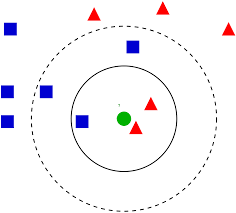

In [ ]:
# kNN model
from sklearn.neighbors import KNeighborsClassifier
model_3nn = KNeighborsClassifier(n_neighbors=3)
model_3nn.fit(raw_data[['x1', 'x2']], raw_data['y'])

In [ ]:
# How to evaluate the kNN model?

# Visualize the decision region.

# 1. create a 100 * 100 grid of points to cover the entire plane.
plot_data = pd.DataFrame()
x1_coordinates = np.linspace(-3, 4, 100) # sample 100 points per row
x2_coordinates = np.linspace(-2, 3, 100) # sample 100 rows (total: 100 * 100 = 10,000 points)
for x1 in x1_coordinates:
    for x2 in x2_coordinates:
        plot_data = plot_data.append({'x1': x1,
                               'x2': x2},
                              ignore_index=True)
plot_data

# 2. use the kNN model to make a prediction on each of the 10,000 points.
plot_data['prediction'] = model_3nn.predict(plot_data[input_cols])
plot_data.head()

In [ ]:
# 3. plot these points: points classified as 0 should be visualized as blue points,
#   points classified as 1 should be visualized as red points.

test_data_blue = plot_data[plot_data['prediction'] == 0]
test_data_red = plot_data[plot_data['prediction'] == 1]
plt.plot(test_data_blue['x1'], test_data_blue['x2'], 'b.', alpha=0.1)
plt.plot(test_data_red['x1'], test_data_red['x2'], 'r.', alpha=0.1)
plt.plot(blue_pts['x1'], blue_pts['x2'], 'b^', label='y = 0')
plt.plot(red_pts['x1'], red_pts['x2'], 'r^', label='y = 1')

In [ ]:
# Calculate the accuracy score on the test set.

# Split the dataset into training set and test set.
# Set the size of test set to be 20%.

# train_test_split
training_data, test_data = train_test_split(raw_data, test_size=0.2)

In [ ]:
# Train the 3-nearest-neighbor model on the training set.
model_3nn_2 = KNeighborsClassifier(n_neighbors=3)
model_3nn_2.fit(training_data[input_cols], training_data['y'])

In [ ]:
# Find the model's predictions on the test set.

test_data['prediction'] = model_3nn_2.predict(test_data[input_cols])
test_data.head()

In [ ]:
# Calculate the accuracy score on the test set.
# accuracy_score()
accuracy_score(test_data['y'], test_data['prediction'])